# Transformer notebook

## Install packages

In [31]:
%%capture
!python -m pip install --upgrade pip;
!python -m pip install ipywidgets;
!python -m pip install datasets torch torchtext;

## Imports

In [32]:
import collections
import datasets
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torch.optim as optim
import torchtext

## Notebook Consts

In [64]:
seed=0
example_item = 1337
max_length = 512

In [38]:
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

## Dataset

### Example dataset using imdb classification

In [55]:
dataset = datasets.load_dataset("zapsdcn/imdb", cache_dir="../data/classification/")
train_dataset = dataset['train'] 
validation_dataset = dataset['validation']
test_dataset = dataset['test']
train_dataset, validation_dataset, test_dataset

(Dataset({
     features: ['id', 'text', 'label'],
     num_rows: 20000
 }),
 Dataset({
     features: ['id', 'text', 'label'],
     num_rows: 5000
 }),
 Dataset({
     features: ['id', 'text', 'label'],
     num_rows: 25000
 }))

In [60]:
train_dataset[example_item]

{'id': 'train_14692',
 'text': "Another movie that relies upon the trite, worn-out cliché of the mad scientist gone madder. The movie centers around a surgeon whose life's ambition is to bring the dead...back to life. I know, I know...you've never heard that one before! Of course, as all of these movies go, the experiment goes very, very wrong and creates a maniacal, bloodthirsty creature. For this promising setup, you'd think that it'd be at least a bit suspenseful. Wrong. Like many movies of this era, the idea is nice, but the execution and the script is mediocre. Not the worst horror movie I've seen (no, Abominator: the Evilmaker 2 still takes the cake)...but not one of the gems, either.",
 'label': 0}

In [57]:
tokenizer = torchtext.data.utils.get_tokenizer("basic_english")

In [62]:
print(tokenizer(train_dataset[example_item]["text"])[1:10])

['movie', 'that', 'relies', 'upon', 'the', 'trite', ',', 'worn-out', 'cliché']


In [63]:
def tokenize(example, tokenizer, max_length):
    tokens = tokenizer(example["text"])[:max_length]
    return {"tokens": tokens}

In [66]:
train_dataset = train_dataset.map(tokenize, fn_kwargs={"tokenizer": tokenizer, "max_length": max_length})
validation_dataset = validation_dataset.map(tokenize, fn_kwargs={"tokenizer": tokenizer, "max_length": max_length})
test_dataset = test_dataset.map(tokenize, fn_kwargs={"tokenizer": tokenizer, "max_length": max_length})

Map: 100%|██████████| 25000/25000 [00:03<00:00, 7713.26 examples/s]


# Plot example

Text(0, 0.5, 'sine')

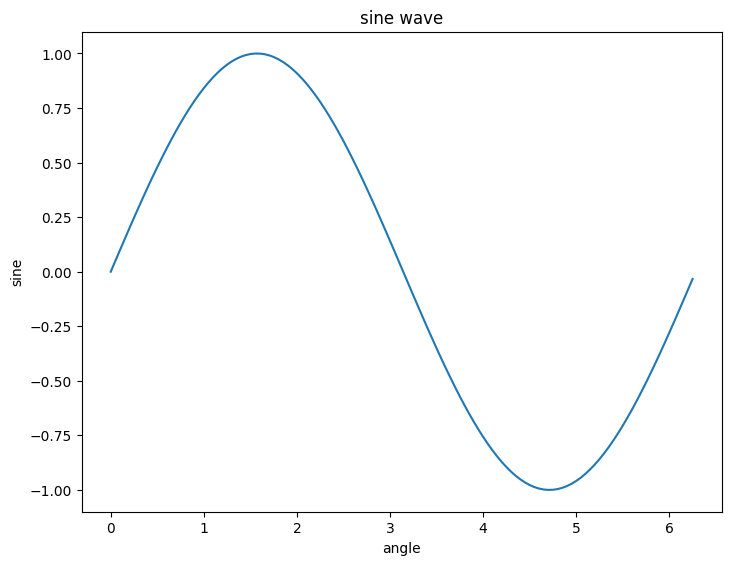

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline
x=np.arange(0,math.pi*2, 0.05)
y=np.sin(x)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_title("sine wave")
ax.set_xlabel('angle')
ax.set_ylabel('sine')